** Hough Lines**

In [0]:
import numpy as np
import matplotlib.pyplot as plt 

import cv2

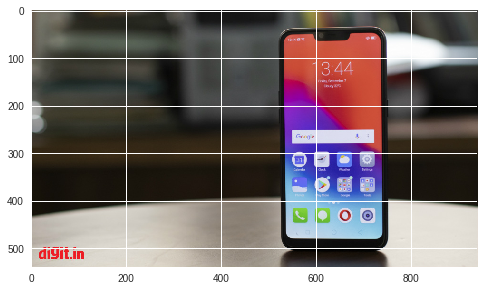

In [5]:
img = cv2.imread("Mobile.jpeg")

img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

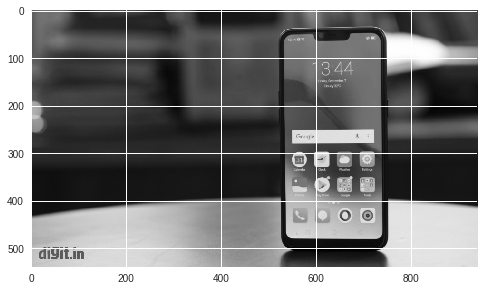

In [7]:
img_copy = np.copy(img)

img_copy = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)

plt.imshow(img_copy , cmap = "gray")
plt.show()

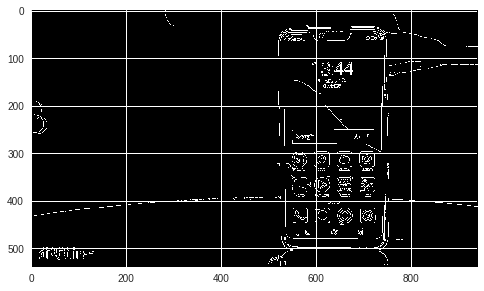

In [21]:
low_bound = 10
high_bound = 70

edges = cv2.Canny( img_copy , low_bound , high_bound)

plt.imshow(edges , cmap = "gray")
plt.show()

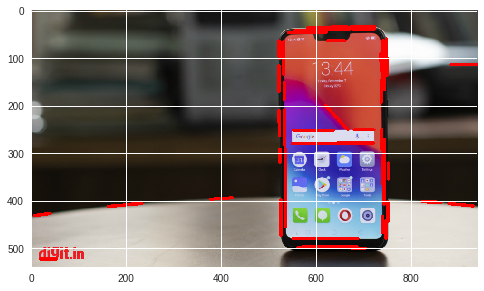

In [30]:
def InsideHoughLines():
    
    '''
       arg1 : image 
       arg2 : rho
       arg3 : theta
       arg4 : threshold
       arg6 = min_line_length
       arg7 = max_line_gap
    ''' 
rho = 1
theta = np.pi/180
threshold = 40
min_line_length = 30
max_line_gap = 2

line_image = np.copy(img)

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

for line in lines :
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)
plt.show()

** Hough Circles**

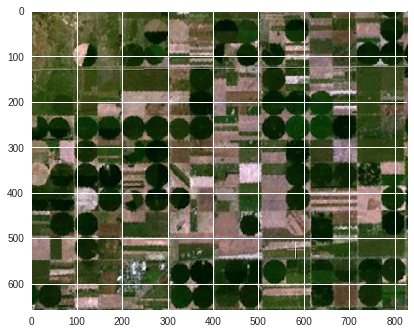

In [31]:
img = cv2.imread("round_farms.jpg")

img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

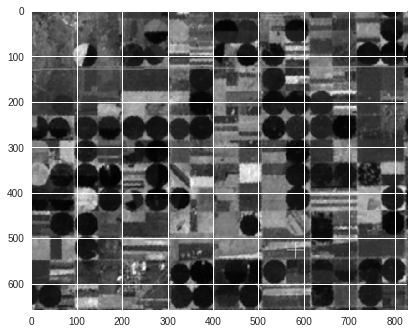

In [32]:
img_copy = np.copy(img)

img_copy = cv2.cvtColor( img_copy , cv2.COLOR_RGB2GRAY)

img_copy = cv2.GaussianBlur(img_copy , (5,5) , 0)

plt.imshow(img_copy , cmap = "gray")
plt.show()

HoughCircles function
HoughCircles takes in a few things as its arguments:

an input image, detection method (Hough gradient), resolution factor between the detection and image (1),
minDist - the minimum distance between circles
param1 - the higher value for performing Canny edge detection
param2 - threshold for circle detection, a smaller value --> more circles will be detected
min/max radius for detected circles
The variable you should change will be the last two: min/max radius for detected circles. Take a look at the image above and estimate how many pixels the average circle is in diameter; use this estimate to provide values for min/max arguments. You may also want to see what happens if you change minDist.

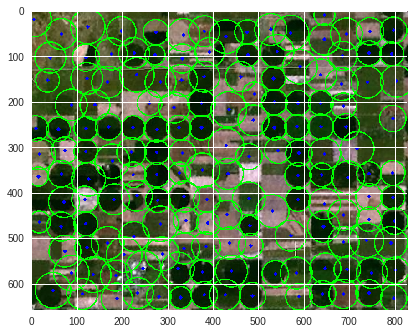

Circles shape:  (1, 159, 3)


In [33]:
img_cp = np.copy(img)

circles = cv2.HoughCircles(img_copy, cv2.HOUGH_GRADIENT, 1, 
                           minDist=45,
                           param1=70,
                           param2=11,
                           minRadius=20,
                           maxRadius=40)


circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_cp,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_cp,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(img_cp)
plt.show()

print('Circles shape: ', circles.shape)